<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 0px;
    }
</style>
<h1>Predictive Modeling - Linear Regression</h1>
<h2>Part I: Research Question</h2>
<h3>A. Purpose of Analysis</h3>
<h4>1. Research Question</h4>
<p>&nbsp; &nbsp; For this analysis, I will be exploring the question “What attributes influence a
customer’s annual bandwidth usage?”</p>
<h4>2. Goals</h4>
<p>&nbsp; &nbsp; The goal of the analysis is to understand how a customer’s demographic, services,
and account information factor into their data usage. I want to know all of the most relevant
factors to see if there are any explainable relationships between the dependent variable
and the independent variables. With this information the business could even predict how
much data a customer will use and adjust their marketing strategy to push users towards
using bandwidth, so another goal is to provide valuable insight for the telecommunications
company.</p>

<h2>Part II: Method Justification</h2>
<h3>B. Multiple Linear Regression Methods</h3>
<h4>1. Summary of Assumptions</h4>
<p>&nbsp; &nbsp; When creating the multiple linear regression model, a statistician must ascertain
some assumptions about the data. First, is that the relationship of the dependent variable
and the independent variables are linear, which can be tested through bivariate scatter
plots between each independent variable and the dependent variable. Another condition of
the regression is the homoscedasticity of residuals. Residuals are the range of error for an
observed value versus the predicted value and “should not display any discernible
pattern” when plotted as a scatterplot (Statistics Solutions, n.d.). This method also
assumes that every variable is independent from one another. Were the variables
dependent on each other, it would lead to a model that fits too well (overfitting) because
these highly related variables would outweigh other independent variables. Multivariate
normality is the fourth condition expected of the regression meaning the residuals have a
normal distribution where every data point has a similar amount of error range for fairness.</p>
<h4>2. Tool Benefits</h4>
<p>&nbsp; &nbsp; Python is a fantastic language choice for data analytics. It’s widespread ability and
large programming community ensure that there are many up-to-date packages. As the
author ‘Let’s Decode’ puts it, “Python’s ecosystem shines in data science because of its
powerful libraries and frameworks” (2023). Furthermore, the use of python in this analysis
is highly beneficial as I have used it to clean a database in a prior class. For this project, I
will be using the following libraries:
<p>
<ul>
<li> Pandas: A library centered around manipulating data frames and series. Very
beneficial to data analytics and is very compatible with the following libraries.</li>
<li>Numpy: Provides mathematical functions that can be used in statistics. In the
scope of this project, I will use its square root feature to find the residual
standard error.</li>
<li>Matplotlib.pyplot: Generates and visualizes graph plots and can display plots
generated even by the Pandas library.</li>
<li>Statsmodels.api: Can create statistic models and summaries from provided
information. The multilinear regression will be conducted using the least
squares method from this library.</li>
</ul>
<h4>3. Appropriate Technique</h4>
<p>&nbsp; &nbsp; Since the research question is to discover the influencing factors behind
‘Bandwidth_GB_Year’, multiple linear regression is an ideal technique. This method is used
to describe the relationship between several independent variables and one continuous,
dependent variable. The coefficients obtained from the technique will demonstrate if
certain factors increase a customer’s data usage or even lower it. Multiple linear regression
can even “predicts trends and future values” relevant to the selected variable (Statistics
Solutions, n.d.-b). Not only will the business discover how ‘Bandwidth_GB_Year’ is
impacted by other variables, but potentially be able to manipulate how much data a
customer uses by altering these factors.</p>

<h2>Part III: Data Preparation</h2>
<h3>C. A Summary of the Data Preparation Process</h3>
<h4>1. Data Cleaning</h4>
<p>&nbsp; &nbsp; The goals of the data cleaning process are to eliminate duplicate rows and cells,
identify missing values and replace them with either mean, median or mode, and to
observe variables with potential outliers and remove them. Given that the file is named
‘churn_clean’ I suspect that there won’t be many mistakes to account for. Beginning the
data cleaning process entails first detecting errors then applying treatment according to
which errors exist. See the attached code ‘NBM3 Task 1.py’ for this entire process.


&nbsp; &nbsp; First, complete row duplicates were detected by subtracting the length of the
database from the length of the database with duplicates dropped (using the
‘drop_duplicates()’ function) which returned with no errors. Then, with the ‘duplicated()’
method, I checked for copies in variables that require unique values, namely ‘CaseOrder’,
‘Customer_id’, and ‘Interaction’. The results have shown that no duplicated values exist in
the database, and so no treatment will be necessary.</p>



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

class text:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def detect_duplicates(col_name):
   """Detect Duplicates: 
      Detects duplicate values in a single column.
   """
   print(f"{col_name}: ",  df.duplicated(subset = col_name).sum())


df = pd.read_csv('churn_clean.csv', keep_default_na = False, 
                 na_values = [' ', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN',
                             '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null'])
# Index values are the same as CaseOrder
df.index = df.index + 1

# region Clean Data
# Duplicates
print(text.UNDERLINE + "Detecting Duplicates" + text.END)
print("Exact row: ", len(df)-len(df.drop_duplicates()))
detect_duplicates('CaseOrder');
detect_duplicates('Customer_id');
detect_duplicates('Interaction');
df.drop_duplicates()

Detecting Duplicates
Exact row:  0
CaseOrder:  0
Customer_id:  0
Interaction:  0


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


<style type="text/css">
    p,ul{
        margin-bottom: 20px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
</style>
<p>&nbsp; &nbsp; Missing values are easy to identify with the ‘isna()’ and ‘sum()’ methods applied to
the data frame. For every column, no null values were present indicating that cleaning is
not needed for this step.</p>

In [6]:
# Missing Values
print(text.UNDERLINE + "\nDetecting Missing Values" + text.END)
print(df.isna().sum())


Detecting Missing Values
CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

<style type="text/css">
    p,ul{
        margin-bottom: 20px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
</style>
<p>&nbsp; &nbsp; The final issue of detecting outliers required me to visually identify numeric values
with ranges that common sense and context deem too large. First the values were sorted by
source (census values, sign-up values, and business generated values) to help determine
how credible the information is. Next, the ‘describe()’ function was applied for all numeric
variables to show every quintile and standard deviation. All the census (‘Population’) and
business generated values (‘Outage_sec_perweek’, ‘Email’, ‘Contacts’,
‘Yearly_equip_failure’, ‘Tenure’, ‘MonthlyCharge’, and ‘Bandwidth_GB_Year’) had reasonable
and explainable ranges of data as well as some of the sign-up values (‘Age’, and ‘Children’).
Only the sign-up value of ‘Income’ exhibited extreme ranges with the first quintile being
348.67 and the fifth quintile at 258,900.70. As a sign-up value, the chance of poorly
reported information is higher than other sources, so ‘Income’ is the only variable that
requires treatment. I used the interquartile range with a threshold of 1.5 revealing 336 rows
of outliers. Since this accounts for only three percent of rows, these rows were removed
from the data frame.</p>

In [7]:
def describe_vars(list_name, list):
   """Describe Vars: 
      Used to describe variables and to visually check for outliers. 


      Compare min and max to each other.
      Compare if 25% is close to min and if 75% is close to max.
      Consider where the information was obtained.
   """
   print(f"{list_name} Values")
   print(str(df[list].describe()) + "\n")
def treat_outliers(col):
   """Treat Outliers: 
      Used to treat outliers using IQR. 
   """
   q1 = df[col].quantile(0.25)
   q3 = df[col].quantile(0.75)
   iqr = q3 - q1
   outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
   print(f"Outlier Count for {col}: {len(outliers)}")
   df.drop(outliers.index, inplace=True)
   print(f"New dataframe length: {len(df)}\n" )
   print(str(df['Income'].describe()))

# Outliers
census_list = ['Population']
signup_list = ['Age', 'Children', 'Income']
business_list = ['Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 
                'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
print(text.UNDERLINE + "\nDetecting Outliers" + text.END)
describe_vars("Census", census_list);
describe_vars("Sign-up", signup_list);
describe_vars("Business Generated", business_list);
print(text.UNDERLINE + "Treating Outliers" + text.END)
treat_outliers('Income')
# endregion


Detecting Outliers
Census Values
          Population
count   10000.000000
mean     9756.562400
std     14432.698671
min         0.000000
25%       738.000000
50%      2910.500000
75%     13168.000000
max    111850.000000

Sign-up Values
                Age    Children         Income
count  10000.000000  10000.0000   10000.000000
mean      53.078400      2.0877   39806.926771
std       20.698882      2.1472   28199.916702
min       18.000000      0.0000     348.670000
25%       35.000000      0.0000   19224.717500
50%       53.000000      1.0000   33170.605000
75%       71.000000      3.0000   53246.170000
max       89.000000     10.0000  258900.700000

Business Generated Values
       Outage_sec_perweek         Email      Contacts  Yearly_equip_failure  \
count        10000.000000  10000.000000  10000.000000          10000.000000   
mean            10.001848     12.016000      0.994200              0.398000   
std              2.976019      3.025898      0.988466              0.63595

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 0px;
    }
</style>
<h4>2. Summary Statistics</h4>
<p>&nbsp; &nbsp; The numeric independent variables for analysis are ‘Children’, ‘Age’, ‘Income’ and
‘Monthly Charge.’ The categorical independent variables include ‘Gender’, ‘Port_modem’,
‘Tablet’, ‘InternetService’, ‘Phone’, ‘Multiple’, ‘StreamingTV’, and ‘StreamingMovies.’ And
since the research question is regarding bandwidth usage, the dependent variable is
‘Bandwidth_GB_Year.’</p>
<ul>
<li>Children - The average customer has about two children with the maximum amount being ten.
Applying a filter to the csv file shows that 773 customers have more than five
children.</li>
<li>Age - The age variable is evenly dispersed with the difference of each quintile being close
to the standard deviation.</li>
<li>Income - Income now no longer has outliers. The new fifth quintile changed to 104,166.70
which is much closer to the first quintile of 348.67 than before.</li>
<li>MonthlyCharge - This variable has an average of 172.59 with a minimum of 79.98 and a maximum of
290.16.</li>
</ul>

In [8]:
# region Describing Regression Independent Variables
print(text.UNDERLINE + "\nDescribing Variables for Analysis" + text.END)
independent_numeric =['Children', 'Age', 'Income', 'MonthlyCharge']
independent_categorical = ['Gender', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'StreamingTV', 'StreamingMovies']
dependent_var = 'Bandwidth_GB_Year'

describe_vars("Numeric Variables", independent_numeric);


Describing Variables for Analysis
Numeric Variables Values
          Children          Age         Income  MonthlyCharge
count  9664.000000  9664.000000    9664.000000    9664.000000
mean      2.086403    53.106374   36735.908054     172.594371
std       2.147776    20.700889   22884.354650      42.906255
min       0.000000    18.000000     348.670000      79.978860
25%       0.000000    35.000000   18759.700000     139.979200
50%       1.000000    53.000000   32086.370000     167.456419
75%       3.000000    71.000000   50636.515000     202.443300
max      10.000000    89.000000  104166.700000     290.160419



<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 0px;
    }
</style>
<ul>
<li>Gender - The gender split between female and male is close to fifty-fifty with nonbinary
making up a minority of customers.
<ul>
    <li>Female: 50.2%</li>
    <li>Male: 47.5%</li>
    <li>Nonbinary: 2.3%</li>
</ul>
</li>
<li>Port Modem - The split between ownership of a port modem is close to fifty-fifty.
    <ul>
    <li>No: 51.5%</li>
    <li>Yes: 48.5%</li>
    </ul>
</li>
<li>Tablet - Around seven out of ten customers do not own a tablet.
    <ul>
    <li>No: 70.1%</li>
    <li>Yes: 29.9%</li>
    </ul>
</li>
<li>Internet Service - The number of clients that use fiber optic is over double the amount that do not use
an internet service.
    <ul>
    <li>Fiber Optic: 44.1%</li>
    <li>DSL: 34.6%</li>
    <li>None: 21.4%</li>
    </ul>
</li>
<li>Phone - A significant majority of customers have a phone.
    <ul>
    <li>No: 9.3%</li>
    <li>Yes: 90.7%</li>
    </ul>
</li>
<li>Multiple - Having multiple phone lines is almost an even spread, with more leaning towards
not having multiple phone lines.
    <ul>
    <li>No: 54%</li>
    <li>Yes: 46%</li>
    </ul>
</li>
<li>Streaming TV - This variable is extremely close to having an even spread of customers who do and
do not have streaming TV.
    <ul>
    <li>No: 50.7%</li>
    <li>Yes: 49.3%</li>
    </ul>
</li>
<li>Streaming Movies - This variable as well is quite close to an even number of customers who do and do
not have movie streaming capabilities.
    <ul>
    <li>No: 51.1%</li>
    <li>Yes: 48.9%</li>
    </ul>
</li>
<li>Bandwidth_GB_Year - This is the dependent variable and the focus of the analysis. It has a minimum of
155.51 and a maximum of 7158.98. The large differences indicate to me that there
are some unknown factors that determine if using data is important to a particular
customer.
</li>
</ul>

In [9]:
def view_categorical_values(cols):
    """View Categorical Values: 
        Used to visually check unique values for categorical columns. 
    """
    for col in cols:  
      print(str(df[col].value_counts())+ "\n")
      
print("Categorical Variables")
view_categorical_values(independent_categorical);
print("Dependent Variable\n" + str(df[dependent_var].describe()) + "\n")

Categorical Variables
Gender
Female       4850
Male         4590
Nonbinary     224
Name: count, dtype: int64

Port_modem
No     4979
Yes    4685
Name: count, dtype: int64

Tablet
No     6775
Yes    2889
Name: count, dtype: int64

InternetService
Fiber Optic    4260
DSL            3340
None           2064
Name: count, dtype: int64

Phone
Yes    8761
No      903
Name: count, dtype: int64

Multiple
No     5219
Yes    4445
Name: count, dtype: int64

StreamingTV
No     4899
Yes    4765
Name: count, dtype: int64

StreamingMovies
No     4939
Yes    4725
Name: count, dtype: int64

Dependent Variable
count    9664.000000
mean     3390.406173
std      2186.853395
min       155.506715
25%      1234.027305
50%      3247.871712
75%      5586.141370
max      7158.981530
Name: Bandwidth_GB_Year, dtype: float64



<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
</style>

<h4>3. Visualizations</h4>

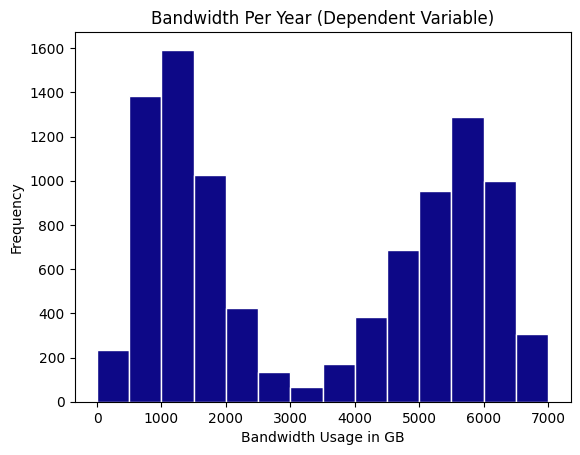

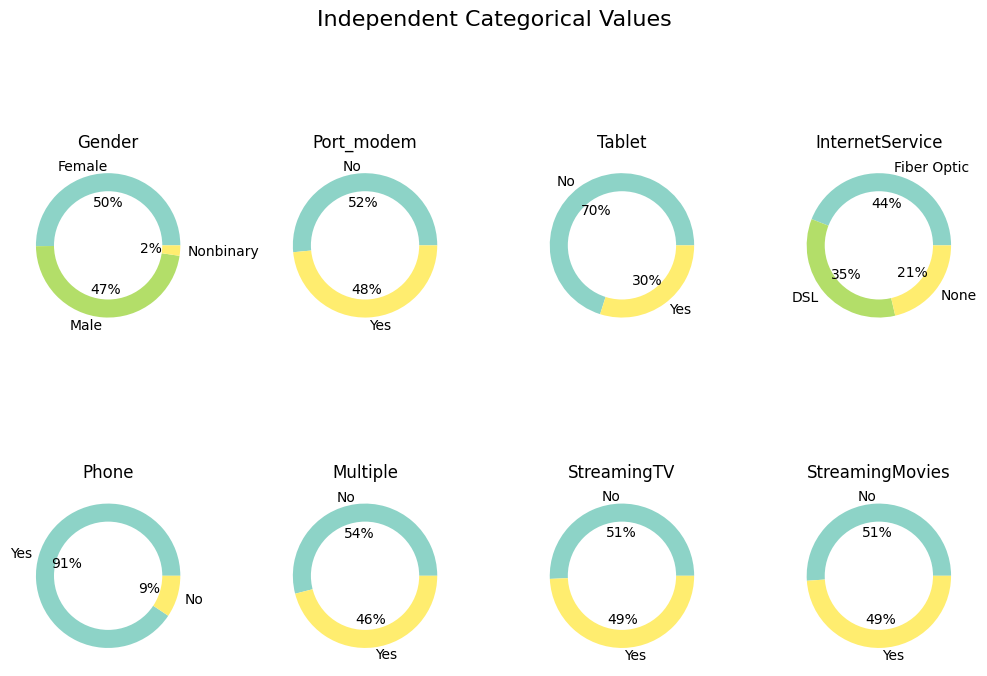

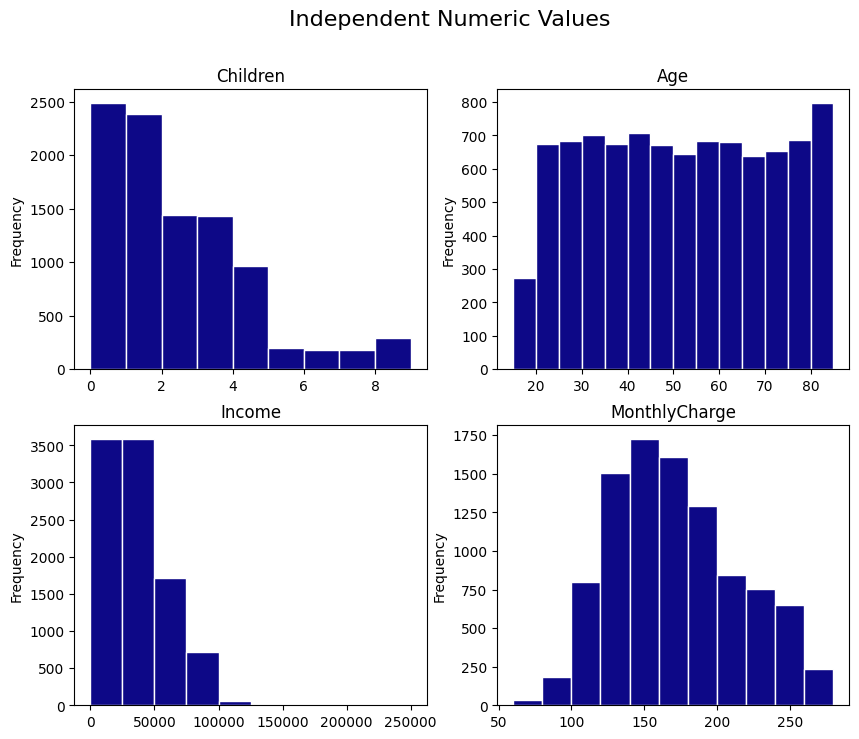

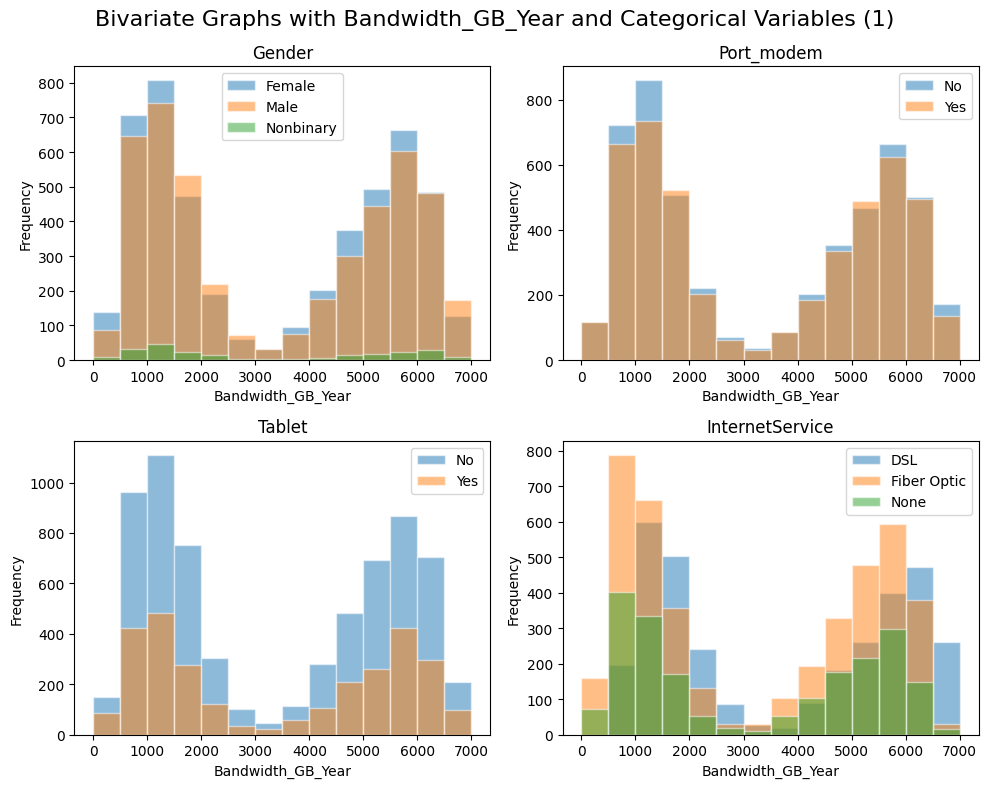

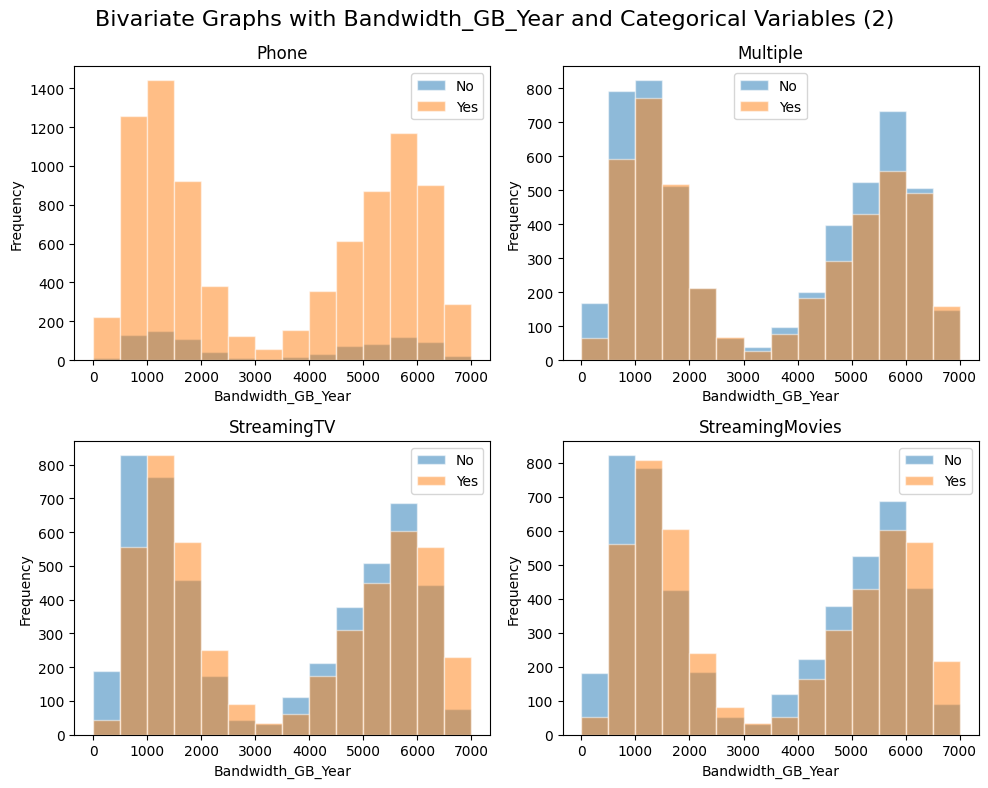

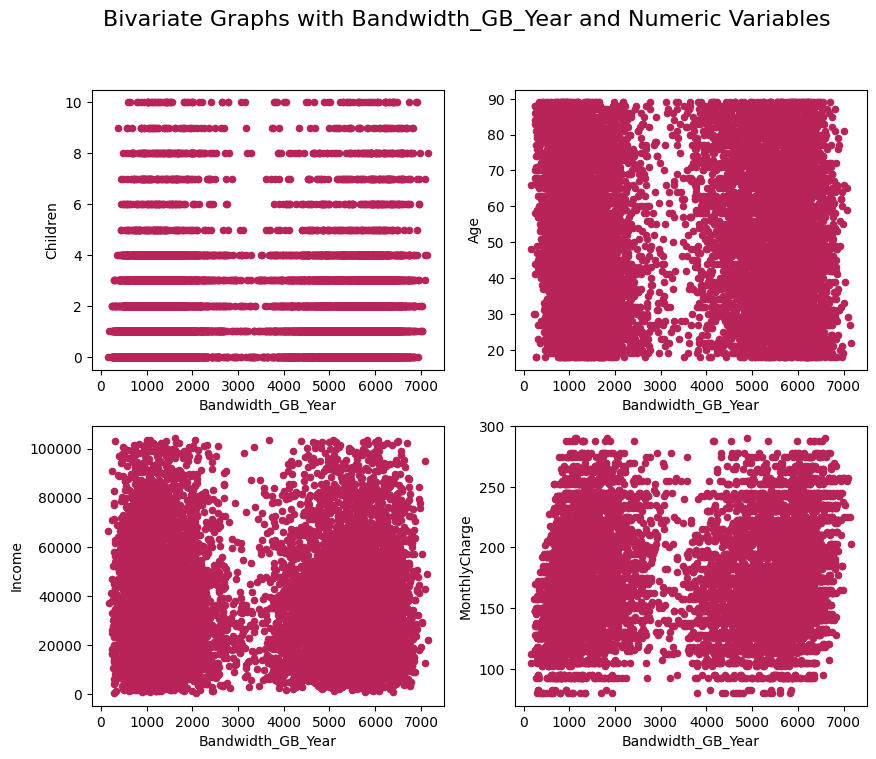

In [ ]:
def plot_categorical_values(cols):
   """Plot Categorical Values:
      Univariate plots for a list of categorical values
   """
   # calculate columns for the plot window
   total_cols = round(len(cols)/2)
   fig = plt.figure(figsize = (10,8))
   fig.suptitle('Independent Categorical Values', fontsize= 16)
   index = 1
   for col in cols:
      plt.subplot(2,total_cols, index)
      # makes a donut graph for categorical values
      df[col].value_counts().plot(kind='pie', autopct='%1.0f%%', colormap='Set3', title=col)
      circle = plt.Circle((0, 0), 0.75, fc='white')
      plt.gcf().gca().add_artist(circle)
      plt.ylabel(None)
      index += 1
   plt.tight_layout()
   plt.show()
def plot_numeric_values(cols):
   """Plot Numeric Values:
      Univariate plots for a list of numeric values
   """
   # These are the bin ranges for each bar graph
   ranges = [range(0,10), range(15, 90, 5), range(0,260000,25000), range(60, 300, 20)]
   # calculate columns for the plot window
   total_cols = round(len(cols)/2)
   fig = plt.figure(figsize = (10,8))
   fig.suptitle('Independent Numeric Values', fontsize= 16)
   index = 1
   for col in cols:
      plt.subplot(2,total_cols, index)
      df[col].plot(
      kind='hist', bins=ranges[index-1], colormap='plasma', edgecolor='white', linewidth=1, title=col)
      index += 1
   plt.show()
def bivariate_categorical(cols, dependent, part):
   """Bivariate categorical:
      Bivariate plots with independent categorical variables and the dependent variable
      Plots in a 2x2 window, so this function runs twice b/c there are 8 categorical variables.
   """
   current_col = 0
   current_row = 0
   fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
   fig.suptitle(f"Bivariate Graphs with {dependent} and Categorical Variables ({part})", fontsize= 16)
   for i in range(4):
      # Creates bivariate histograms [In-Text Citation: (jhelpz, 2019)]
      df.groupby(cols[i])[dependent].plot.hist(alpha=0.5, bins=range(0,7500,500), ax=axes[current_row,current_col], edgecolor='white', linewidth=1, title=f"{cols[i]}")
      axes[current_row,current_col].legend(sorted(df[cols[i]].unique()))
      axes[current_row,current_col].set_xlabel(dependent)
      # The row index value is updated before the column
      if(current_col < 1):
         current_col += 1
      else:
         current_col = 0
         current_row += 1
   plt.tight_layout()
   plt.show()
def bivariate_numeric(cols, dependent):
   """Bivariate numeric:
      Bivariate plots with independent numeric variables and the dependent variable.
      Is also a 2x2 window
   """
   current_col = 0
   current_row = 0
   fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
   fig.suptitle(f"Bivariate Graphs with {dependent} and Numeric Variables", fontsize= 16)
   for col in cols:
      df.plot.scatter(x=dependent, y=col, ax=axes[current_row,current_col], c='#b82359')
      axes[current_row,current_col].set_xlabel(dependent)
       # The row index value is updated before the column
      if(current_col < 1):
         current_col += 1
      else:
         current_col = 0
         current_row += 1
   plt.show()
   
# graphs
df[dependent_var].plot(
   kind='hist', bins=range(0,7500,500), colormap='plasma', edgecolor='white', linewidth=1, title='Bandwidth Per Year (Dependent Variable)')
plt.xlabel('Bandwidth Usage in GB')
plt.show();
plot_categorical_values(independent_categorical);
plot_numeric_values(independent_numeric);
bivariate_categorical(independent_categorical[0:4], dependent_var, 1)
bivariate_categorical(independent_categorical[4:9], dependent_var, 2)
bivariate_numeric(independent_numeric, dependent_var)


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
</style>

<h4>4. Data Transformation</h4>
<p>&nbsp; &nbsp; Adjustments on the database will only include transformations that affect variables
relevant to the analysis. Therefore, the first goal will be to eliminate all columns aside from
the independent variables and the dependent variable. This is accomplished by filtering the
original data frame (using the ‘filter()’ function) and replacing the original data frame with
the filtered version. Then, the filter is verified by printing the column names. Doing this step
first allows for easier observation on further transformations needed.

&nbsp; &nbsp; The second transformation required for regression analysis is converting all
categorical variables into numeric, dummy variables. The ‘.get_dummies()’ method of the
pandas library converts all string and object variables to dummy variables. Affected
columns include ‘Gender’, ‘Port_modem’, ‘Tablet’, ‘InternetService’, ‘Phone’, ‘Multiple’,
‘StreamingTV’ and ‘StreamingMovies’. To avoid potential multicollinearity, the ‘drop_first’
attribute is enabled so only k-1 dummy variables are generated (where k is the number of
valid options in a categorical variable).
</p>

In [12]:
# region Data Transformations
print(text.UNDERLINE + "\n\nData Transformations" + text.END)
# remove excess columns
relevant_columns = independent_categorical + independent_numeric
relevant_columns.append(dependent_var)
df = df.filter(relevant_columns)
print("Excess Columns Removed. Remaining Columns:")
print(df.columns.values)
df = pd.get_dummies(df, drop_first=True, dtype=int)
print("With Dummy Columns:")
print(df.columns.values)



Data Transformations
Excess Columns Removed. Remaining Columns:
['Gender' 'Port_modem' 'Tablet' 'InternetService' 'Phone' 'Multiple'
 'StreamingTV' 'StreamingMovies' 'Children' 'Age' 'Income' 'MonthlyCharge'
 'Bandwidth_GB_Year']
With Dummy Columns:
['Children' 'Age' 'Income' 'MonthlyCharge' 'Bandwidth_GB_Year'
 'Gender_Male' 'Gender_Nonbinary' 'Port_modem_Yes' 'Tablet_Yes'
 'InternetService_Fiber Optic' 'InternetService_None' 'Phone_Yes'
 'Multiple_Yes' 'StreamingTV_Yes' 'StreamingMovies_Yes']


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
</style>

<h4>5. Prepared Data Set</h4>
<p>&nbsp; &nbsp; The transformed data set is included in a file named ‘churn_regression.csv’.</p>

In [13]:
df.to_csv('churn_regression.csv')
print("Values saved to 'churn_regression.csv'")

Values saved to 'churn_regression.csv'


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
</style>

<h2>Part IV: Model Comparison and Analysis</h2>
<h3>D. Initial and Reduced Linear Regressions</h3>
<h4>1. Initial Model</h4>

In [15]:
def regression_summary(indepen_columns, y, dropped):
   """Regression Summary:
      Creates a regression summary based on the passed values
   """
   print(f"\nDropped Columns: {dropped[1:]}")
   # Creates the regression model/summary [In-Text Citation: (Bobbitt, 2022)]
   x = sm.add_constant(indepen_columns)
   model = sm.OLS(y, x).fit()
   print(model.summary())
   return model

# region Multilinear Regression Model
dropped_columns = [dependent_var, 'StreamingMovies_Yes', 'Tablet_Yes', 'Income', 'Gender_Male', 'Phone_Yes', 
                  'Port_modem_Yes', 'Gender_Nonbinary', 'StreamingTV_Yes', 'Age']
regression_summary(df.drop(columns=dropped_columns[0:1]), df[dependent_var], dropped_columns[0:1]);


Dropped Columns: []
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.94
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           7.68e-31
Time:                        11:36:44   Log-Likelihood:                -87940.
No. Observations:                9664   AIC:                         1.759e+05
Df Residuals:                    9649   BIC:                         1.760e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
</style>

<h4>2. Justification of Model Reduction</h4>
<p>&nbsp; &nbsp; To reduce the regression model, all variables with p-values greater than 0.05 will be
removed. The p-value represents how unique the data is with smaller values indicating
greater significance. When used in a regression model, this value describes the correlation
between the selected independent variable and the dependent variable and whether their
relationship is “statistically significant” (Frost, n.d.). It is also important to consider that if a
variable is removed based on the p-value, the regression must be rerun as it could
potentially affect the values of the other variables. By removing all the high p-values, the
remaining variables will have a significant connection to dependent variable. With that in
mind, this process will determine and resolve the research question of which factors
influence ‘Bandwidth_GB_Year’.</p>
<h4>3. Reduced Linear Regression Model</h4>
<p>&nbsp; &nbsp; Given the model summary from D1, the first variable/dummy variable removed from
the analysis will be ‘StreamingMovies_Yes’. Here is the resulting summary and the code
used to create it:</p>

In [16]:
# region Multilinear Regression Model
print(text.UNDERLINE + "\nMultilinear Regression" + text.END)
# independent variables that are removed
dropped_columns = [dependent_var, 'StreamingMovies_Yes', 'Tablet_Yes', 'Income', 'Gender_Male', 'Phone_Yes', 
                  'Port_modem_Yes', 'Gender_Nonbinary', 'StreamingTV_Yes', 'Age']
# performs a regression summary increasing the amount of dropped columns for each summary
for i in range(1, len(dropped_columns)):
   regression_summary(df.drop(columns=dropped_columns[0:i]), df[dependent_var], dropped_columns[0:i]);
final_model = regression_summary(df.drop(columns=dropped_columns[0:]), df[dependent_var], dropped_columns[0:]);


Multilinear Regression

Dropped Columns: []
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.94
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           7.68e-31
Time:                        11:37:04   Log-Likelihood:                -87940.
No. Observations:                9664   AIC:                         1.759e+05
Df Residuals:                    9649   BIC:                         1.760e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 0px;
    }
</style>
<p>&nbsp; &nbsp; The reduced model maintains the ‘Children’, ‘MonthlyCharge’, ‘InternetService_Fiber Optic’,
‘InternetService_None’ and ‘Multiple_Yes’ variables.</p>
<h3>E. Analysis of Reduced Linear Regression Model</h3>
<h4>1. Model Comparison</h4>
<p>&nbsp; &nbsp; To determine the significance of the model, the prob(F-statistic) of the initial model
will be evaluated against the reduced regression model. Prob(F-statistic) as an evaluation
metric “tells the overall significance of the regression” and “depicts the probability of null
hypothesis being true” (Yadav, 2019). It is the same as how a p-value predicts the
significance of variable, except it predicts the significance of the entire model itself.
Furthermore, it is evaluated the same way as a p-value where values below 0.05 indicate
importance and the smaller the value, the more meaningful the regression model is. With
that in mind, the initial model, with all 14 variables, has a prob(F-statistic) value of 7.68e-31
which is already below 0.05 and indicates statistical significance. After decreasing the
model by nine variables based on their p-values, that value shrank to 2.87e-35. Reduction
has increased the significance of this linear regression and the importance of the
independent variables themselves.</p>
<h4>2. Output and Calculations</h4>


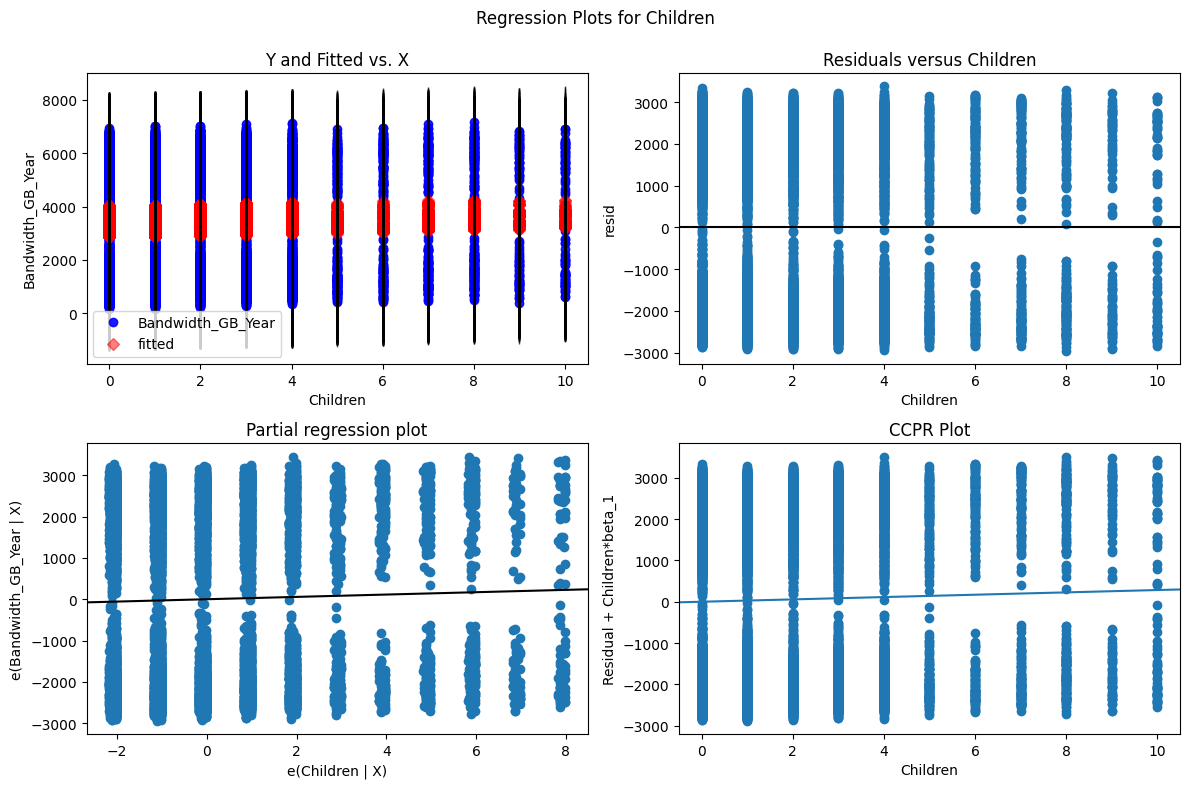

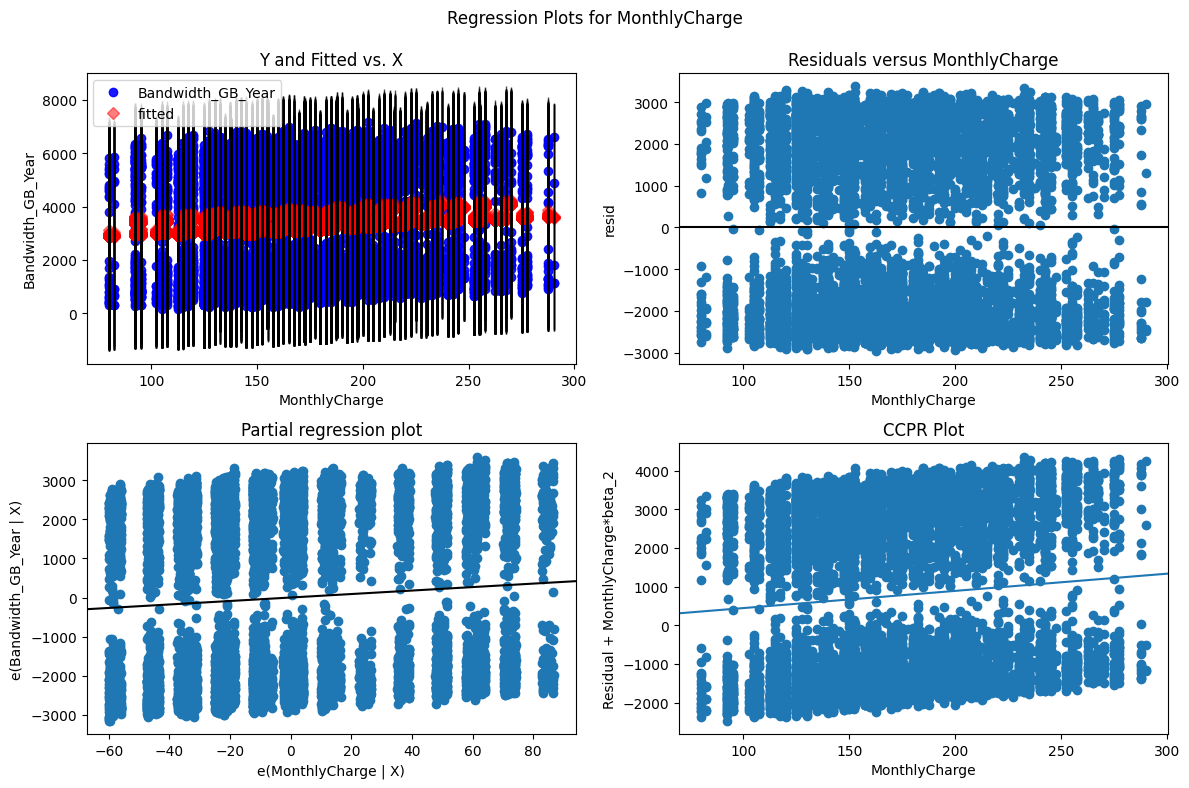

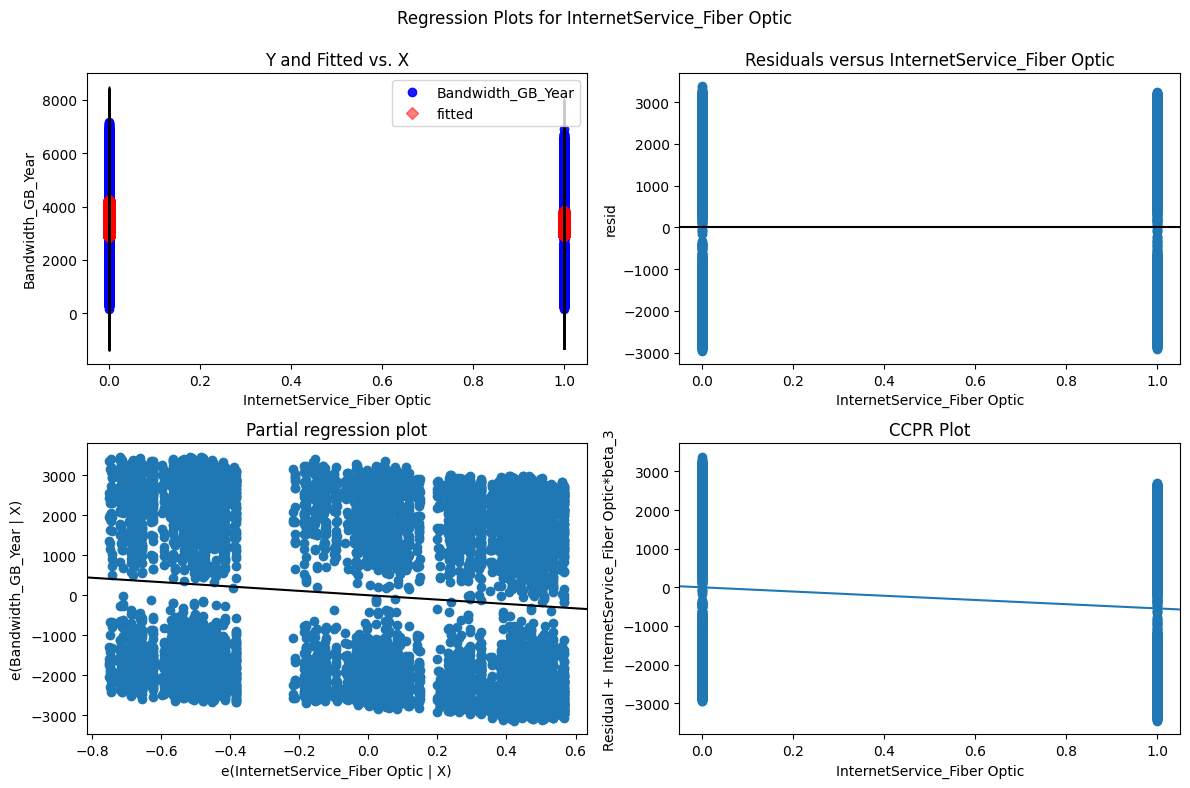

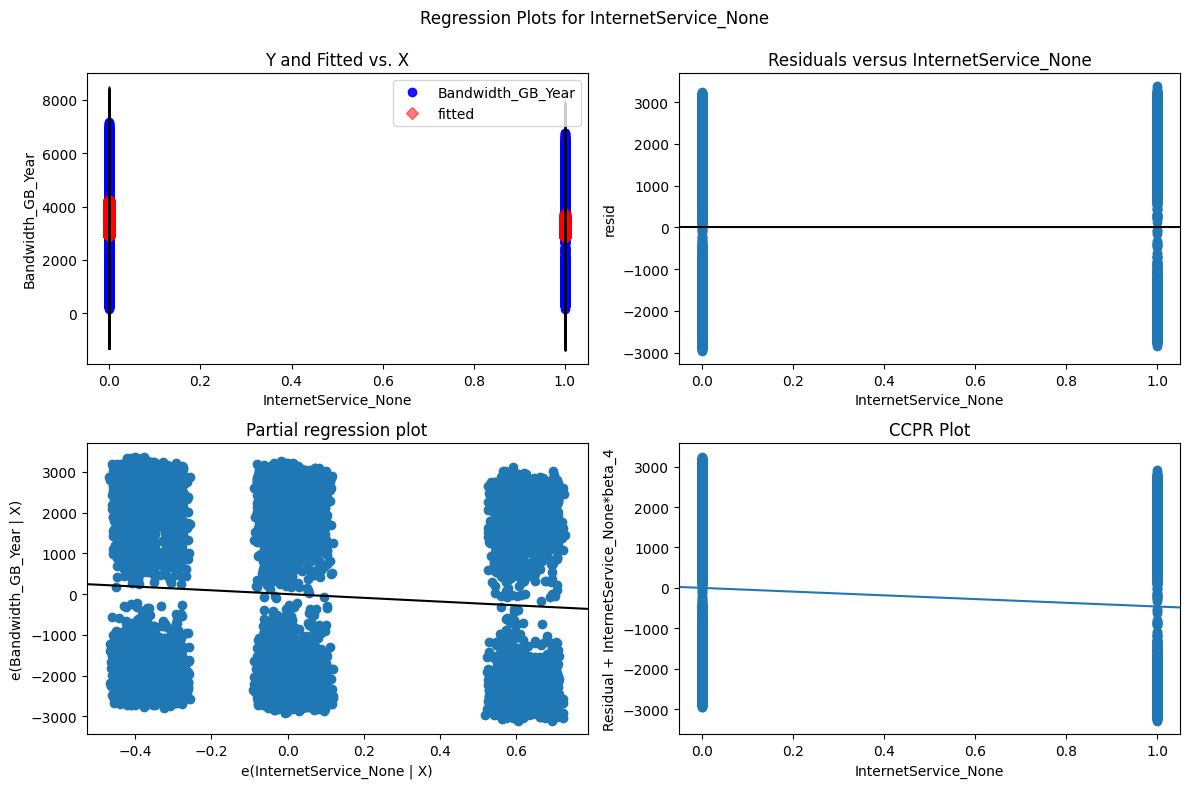

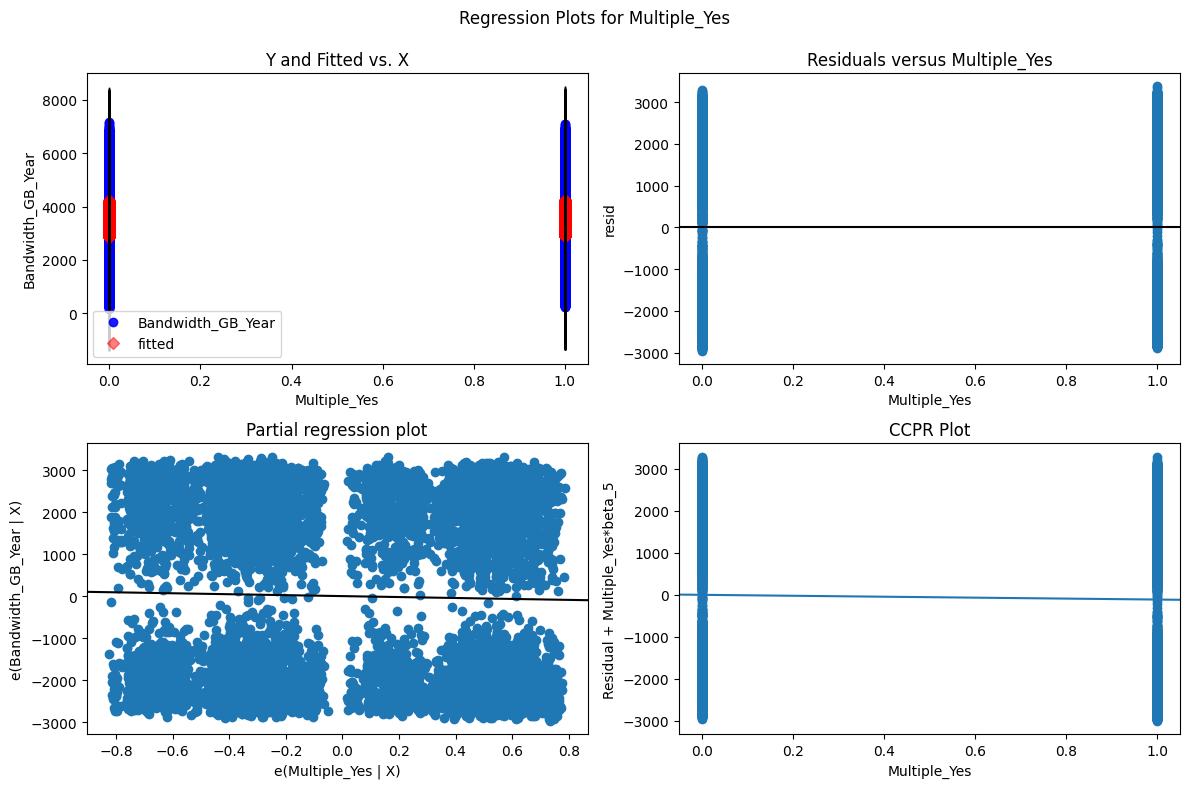


Residual Standard Error: 2168.0423266696557


In [18]:
# residual graphs
kept_columns = ['Children', 'MonthlyCharge', 'InternetService_Fiber Optic', 'InternetService_None', 'Multiple_Yes']
for col in kept_columns:
   # Residual Plot [In-Text Citation: (Bobbitt, 2020)]
   resid_fig = plt.figure(figsize=(12,8))
   sm.graphics.plot_regress_exog(final_model, col, fig=resid_fig)
   plt.show()
# Residual Plot [In-Text Citation: (Straw, 2024)]
print(f"\nResidual Standard Error: {np.sqrt(final_model.mse_resid)}")

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 0px;
    }
</style>

<h2>Part V: Data Summary and Implications</h2>
<h3>F. Summary of Findings and Assumptions</h3>
<h4>1. Results</h4>
<p><i>A. Regression Equation</i></p>
<p> 𝑦 = 2955.3121 + 28.3234(Children) + 4.4442(MonthlyCharge) − 546.1277(InternetService_Fiber Optic) − 461.5786(InternetService_None) − 112.4473(Multiple_Yes)</p>
<p><i>B. Interpreting the Coefficients</i></p>
<p>Assuming all other factors are constant:
    <ul>
    <li>Increasing a customer’s number of children by one will increase annual bandwidth usage by 28.3234 gigabytes.</li>
    <li>A dollar increase to monthly charge adds 4.4442 gigabytes to the annual bandwidth usage.</li>
    <li>If a customer has ‘Fiber Optic’ listed as their internet service, they use 546.1277 less gigabytes annually than those with ‘DSL’.</li>
    <li>If a customer has ‘None’ listed as their internet service, they use 461.5786 less gigabytes annually than those with ‘DSL’.</li>
    <li>Having multiple lines will decrease annual bandwidth usage by 112.4473 gigabytes in comparison to not having multiple lines.</li>
    </ul>
</p>
<p><i>C. Statistical and Practical Significance</i></p>
<p>&nbsp; &nbsp; Speaking statistically, there is a large range for ‘Bandwidth_GB_Year’ which
results a very low R-squared value. For this regression, the R-squared value of 0.018
indicates that only 1.8% of the variability is accounted for. However, in reducing the
model based on p-value I have ensured that every remaining independent variable
has a significant correlation to the dependent variable. Additionally, the prob(F-
statistic) value is incredibly close to zero indicating this multilinear regression is still
meaningful. So mathematically, the reduced model is significant.


&nbsp; &nbsp; In practice, however, the importance of the model isn’t quite as clear. Most of
the remaining independent variables are not determined by the business’ actions
but rather by the client’s profile or selected business services. This makes it harder
to manipulate how much annual bandwidth a customer uses. The only independent
variable the business could use to affect bandwidth is a client’s monthly charge.
Depending on how the business wishes to use this information, there is some
amount of practical significance.</p>
<p><i>D. Limitations of Analysis</i></p>
<p>&nbsp; &nbsp; This data analysis is limited due to the lack of further information from the
business. As determined by what the ‘Churn’ variable represents, only current
customers and customers that have just canceled their services exist in this
database. While the provided file is great at discovering current trends and patterns,
it has a blind spot in trends over time. On the topic of constraints by missing
information, it is unclear whether customers are allowed to alter information
provided at sign-up. Changes in one’s age, income, gender, and number of children,
all of which were initial independent variables, could result in different coefficients
or p-values. Another important limitation to consider is while there is a correlation
between the independent variables and ‘Bandwidth_GB_Year’ it does not mean
these variables will guarantee what the dependent’s value is. For example, a
customer’s monthly charge is not the sole result of data usage but also results from
other services they use from the company. An increased monthly charge could be
explained by increased bandwidth, but it is not the only explanation.</p>
<h4>2. Recommendations</h4>
<p>&nbsp; &nbsp; Based on the results of the analysis, and assuming the telecommunications
company wishes increase bandwidth usage for customer retention, I would recommend a
marketing strategy that prioritizes families. An increase in children is great way to boost
data usage and revenue for the business. Given the comparisons in bandwidth usage
based on internet service, it would also be beneficial to promote the DLS internet service
option.

&nbsp; &nbsp; Separate from the business’ promotional activities, a retrospective on project would
help the company improve its interactions with future analytics companies or teams. The
limitations for this project came from lack of knowledge and a lack of an entire customer
base. If the business learns what the research team requires, more complete and accurate
estimations of customers will result from future projects.</p>

<h3>H. Sources of Third-Party Code</h3>
<p>Bobbitt, Z. (2020, July 21). How to Create a Residual Plot in Python. Statology. <a href="https://www.statology.org/residual-plot-python/">https://www.statology.org/residual-plot-python/</a>

Bobbitt, Z. (2022, April 1). How to Get Regression Model Summary from Scikit-Learn.
Statology. https://www.statology.org/sklearn-linear-regression-summary/

jhelpz. (2019, October 18). Need to use opaque or transparent colors on stacked histogram
& add legend. Stack Overflow.
https://stackoverflow.com/questions/58443508/need-to-use-opaque-or-transparent-colors-on-stacked-histogram-add-legend

Straw, E. (2024). Dr. Straw’s Tips for Success in D208. In D208 Student Facing Resources.
Western Governor’s University.
https://westerngovernorsuniversity.sharepoint.com/:b:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Straw%20tips%20for%20success%20in%20D208%202024.5.10.pdf?csf=1&web=1&e=8SggjE</p>
<h3>I. Sources</h3>
<p>Frost, J. (n.d.). How to Interpret P-values and Coefficients in Regression Analysis. Statistics
by Jim. <a href="https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/">https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/</a>

Let’s Decode. (2023, October 1). Why Should You Choose Python over R for Data Science?
Medium. https://medium.com/@debopamdeycse19/python-vs-r-for-data-science-which-should-i-learn-a236c197c2bd

Statistics Solutions. (n.d.). Assumptions of Multiple Linear Regression.
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/

Statistics Solutions. (n.d.-b). What is Multiple Linear Regression?
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-multiple-linear-regression/

Straw, E. (2024). Dr. Straw’s Tips for Success in D208. In D208 Student Facing Resources.
Western Governor’s University.
https://westerngovernorsuniversity.sharepoint.com/:b:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Straw%20tips%20for%20success%20in%20D208%202024.5.10.pdf?csf=1&web=1&e=8SggjE

Yadav, J. (2019, August 15). Statistics: How Should I interpret results of OLS? Medium.
https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01</p>